In [11]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import csv
import networkx as nx

import numpy as np
import matplotlib.pyplot as plt

In [12]:
path_pollination="/home/path..."
path_annemone_fish="/home/path..."
path_seed_dispersal="/home/path..."

# Pollination

In [13]:
f=open(path_pollination+"files.txt","r")
lines=f.readlines()
lines = [s.rstrip() for s in lines]

Media of species observed in a pollinization ecosystem:  99.03846153846153
Media of links observed in a pollinization ecosystem:  271.7435897435897
Media of connectances observed in a pollinization ecosystem:  0.0382902619178662
[185, 107, 61, 114, 371, 78, 52, 49, 142, 107, 27, 84, 65, 110, 797, 205, 104, 144, 125, 111, 768, 66, 95, 29, 57, 159, 78, 180, 167, 81, 97, 40, 47, 154, 97, 22, 50, 50, 68, 72, 74, 18, 110, 719, 43, 60, 205, 266, 262, 49, 104, 54, 393, 431, 259, 456, 997, 113, 26, 50, 50, 58, 67, 87, 71, 68, 47, 58, 39, 34, 37, 38, 48, 51, 56, 52, 48, 31, 30, 28, 44, 39, 38, 17, 22, 20, 22, 34, 35, 32, 25, 16, 19, 18, 19, 26, 17, 24, 27, 22, 29, 32, 25, 29, 28, 36, 29, 16, 20, 19, 27, 26, 20, 24, 24, 8, 10, 22, 24, 30, 33, 30, 35, 13, 17, 25, 21, 34, 34, 35, 23, 1500, 64, 22, 26, 36, 36, 40, 24, 14, 11, 16, 52, 106, 96, 117, 94, 84, 94, 82, 94, 76, 88, 108, 102, 72]


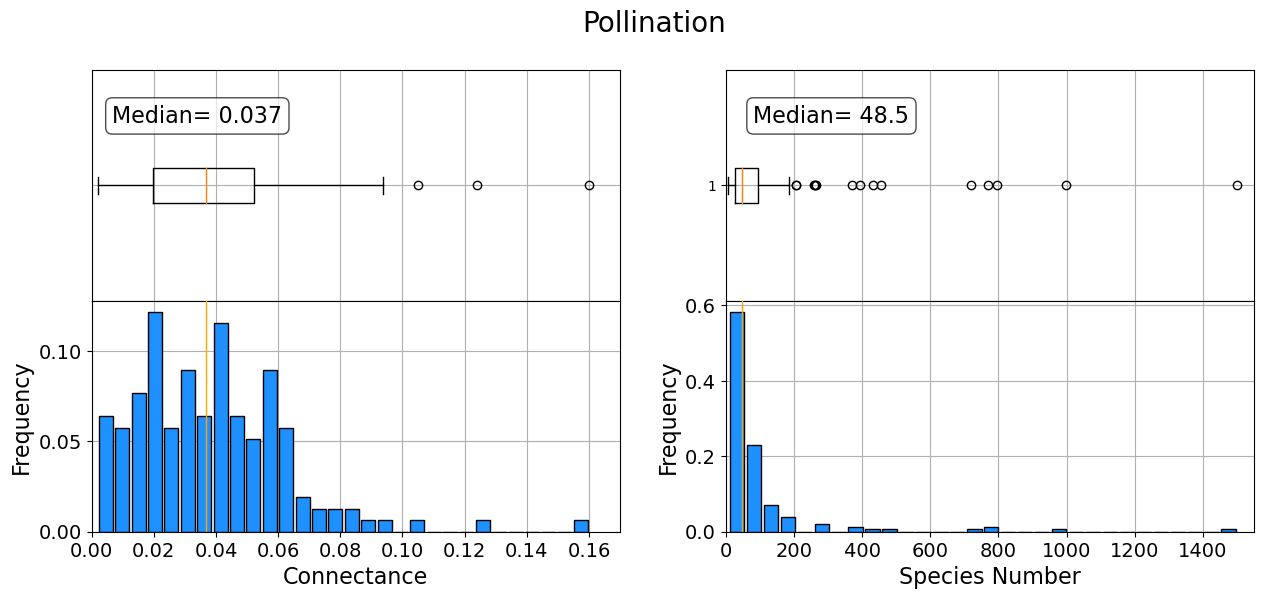

In [14]:
#Initialization of variables
S=[]
L=[]
C=[]

for line in lines :
    reader = csv.reader(open(path_pollination+line), delimiter=",")
    x = list(reader)
    mat = np.array(x).astype("float")

    # Number of species
    Species = (mat.shape[0]+ mat.shape[1]) 

    # Number of links
    A=mat.flatten()
    A=A[A!=0]
    Links=len(A)

    # Connectance
    Connectances= Links/(Species**2)

    S.append(Species)
    L.append(Links)
    C.append(Connectances)

Smedia=np.mean(S)
Lmedia=np.mean(L)
Cmedia=np.mean(C)
#median
Smedian=np.median(S)
Lmedian=np.median(L)
Cmedian=np.median(C)


print("Media of species observed in a pollinization ecosystem: ",Smedia)
print("Media of links observed in a pollinization ecosystem: ",Lmedia)
print("Media of connectances observed in a pollinization ecosystem: ",Cmedia)

#Figures
plt.figure(figsize=(15,6))


plt.subplot(221)
#plt.title('Histogram for Connectances', fontsize=16)
plt.boxplot(C,vert=False)
#Print round value for median text value
bbox_props=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
plt.text(0.2, 0.8, "Median= "+str(round(Cmedian,3)), fontsize=16, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes,bbox=bbox_props)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.grid()
plt.xlim(0, 0.17)

plt.subplot(223)
#normalized histogram y axis
counts, bins = np.histogram(C, bins=30)
#normalize counts
counts=counts/sum(counts)
#vertical lines
plt.axvline(x=Cmedian, color='orange', linestyle='-',linewidth=1,zorder=3)
plt.hist(bins[:-1], bins, weights=counts,alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)
#plt.hist(C,bins=30,  alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2, density=True,stacked=True)


plt.ylabel('Frequency',fontsize=16)
plt.xlabel("Connectance", fontsize=16)
#tikcs size bigger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(zorder=1)
plt.xlim(0, 0.17)

plt.subplot(222)
#plt.title('Histogram for Species', fontsize=16)
#No x axis boxplot
plt.boxplot(S,vert=False)
#Print round value for median text value
bbox_props=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
plt.text(0.2, 0.8, "Median= "+str(round(Smedian,2)), fontsize=16, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes,bbox=bbox_props)
plt.xlim(0, 1550)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.grid()

plt.subplot(224)
#normalized histogram y axis
counts, bins = np.histogram(S, bins=30)
#normalize counts
counts=counts/sum(counts)
#vertical lines
plt.axvline(x=Smedian, color='orange', linestyle='-',linewidth=1,zorder=3)
plt.hist(bins[:-1], bins, weights=counts,alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)

#plt.hist(S,bins=30,  alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel("Species Number", fontsize=16)
#tikcs size bigger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(zorder=1)
#x axis set
plt.xlim(0, 1550)

#join upper and lower plots
plt.subplots_adjust(hspace=0)

plt.suptitle("Pollination", fontsize=20)
plt.savefig("/home/path.../pollination.png",dpi=300,bbox_inches="tight")

print(S)

In [15]:
np.sum(counts)

1.0000000000000002

# Annemone fish

In [16]:
f=open(path_annemone_fish+"files.txt","r")
lines=f.readlines()
lines = [s.rstrip() for s in lines]

Media of species observed in a Annemone Fish ecosystem:  9.529411764705882
Media of links observed in a Annemone Fish ecosystem:  10.470588235294118
Media of connectances observed in a Annemone Fish ecosystem:  0.09838676624613726


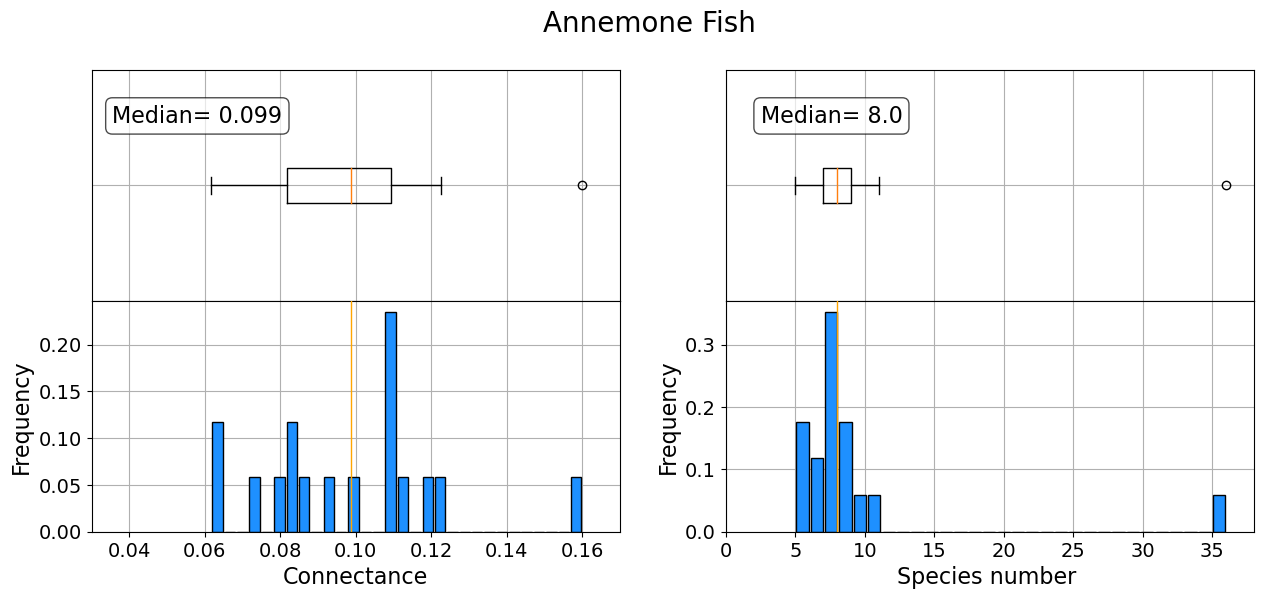

In [17]:
#Initialization of variables
S=[]
L=[]
C=[]

for line in lines :
    reader = csv.reader(open(path_annemone_fish+line), delimiter=",")
    x = list(reader)
    mat = np.array(x).astype("float")

    # Number of species
    Species = (mat.shape[0]+ mat.shape[1])

    # Number of links
    A=mat.flatten()
    A=A[A!=0]
    Links=len(A)

    # Connectance
    Connectances= Links/(Species**2)

    S.append(Species)
    L.append(Links)
    C.append(Connectances)

Smedia=np.mean(S)
Lmedia=np.mean(L)
Cmedia=np.mean(C)
#median
Smedian=np.median(S)
Lmedian=np.median(L)
Cmedian=np.median(C)


print("Media of species observed in a Annemone Fish ecosystem: ",Smedia)
print("Media of links observed in a Annemone Fish ecosystem: ",Lmedia)
print("Media of connectances observed in a Annemone Fish ecosystem: ",Cmedia)


#Figures
plt.figure(figsize=(15,6))


plt.subplot(221)

plt.boxplot(C,vert=False)
#Print round value for median text value
bbox_props=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
plt.text(0.2, 0.8, "Median= "+str(round(Cmedian,3)), fontsize=16, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes,bbox=bbox_props)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.grid()
plt.xlim(0.03, 0.17)
plt.subplot(223)
#normalized histogram y axis
counts, bins = np.histogram(C, bins=30)
#normalize counts
counts=counts/sum(counts)
#Vertical line across median in boxplot and histogram
plt.axvline(x=Cmedian, color='orange', linestyle='-',linewidth=1,zorder=3)


plt.hist(bins[:-1], bins, weights=counts,alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)
#

#plt.hist(C,bins=30, color='dodgerblue',edgecolor="black", alpha=1, rwidth=0.85,zorder=2)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel("Connectance", fontsize=16)
#tikcs size bigger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.xlim(0.03, 0.17)
plt.subplot(222)

plt.boxplot(S,vert=False)
#Print round value for median text value
bbox_props=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
plt.text(0.2, 0.8, "Median= "+str(round(Smedian,2)), fontsize=16, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes,bbox=bbox_props)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.grid()
plt.xlim(0, 38)
plt.subplot(224)
#normalized histogram y axis
counts, bins = np.histogram(S, bins=30)
#normalize counts
counts=counts/sum(counts)
#vertical lines
plt.axvline(x=Smedian, color='orange', linestyle='-',linewidth=1,zorder=3)
plt.hist(bins[:-1], bins, weights=counts,alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)

#plt.hist(S,bins=30, color='dodgerblue',edgecolor="black", alpha=1, rwidth=0.85,zorder=2)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel("Species number ", fontsize=16)
#tikcs size bigger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.xlim(0, 38)
#join upper and lower plots
plt.subplots_adjust(hspace=0)


plt.suptitle("Annemone Fish ", fontsize=20)
plt.savefig("/home/path.../annemone_fish.png",dpi=300,bbox_inches="tight")


# Seed dispersal

In [18]:
f=open(path_seed_dispersal+"files.txt","r")
lines=f.readlines()
lines = [s.rstrip() for s in lines]

Media of species observed in Seed dispersal ecosystem:  53.14705882352941
Media of links observed in a Seed dispersal ecosystem:  154.08823529411765
Media of connectances observed in a Seed dispersal ecosystem:  0.07299212830856999


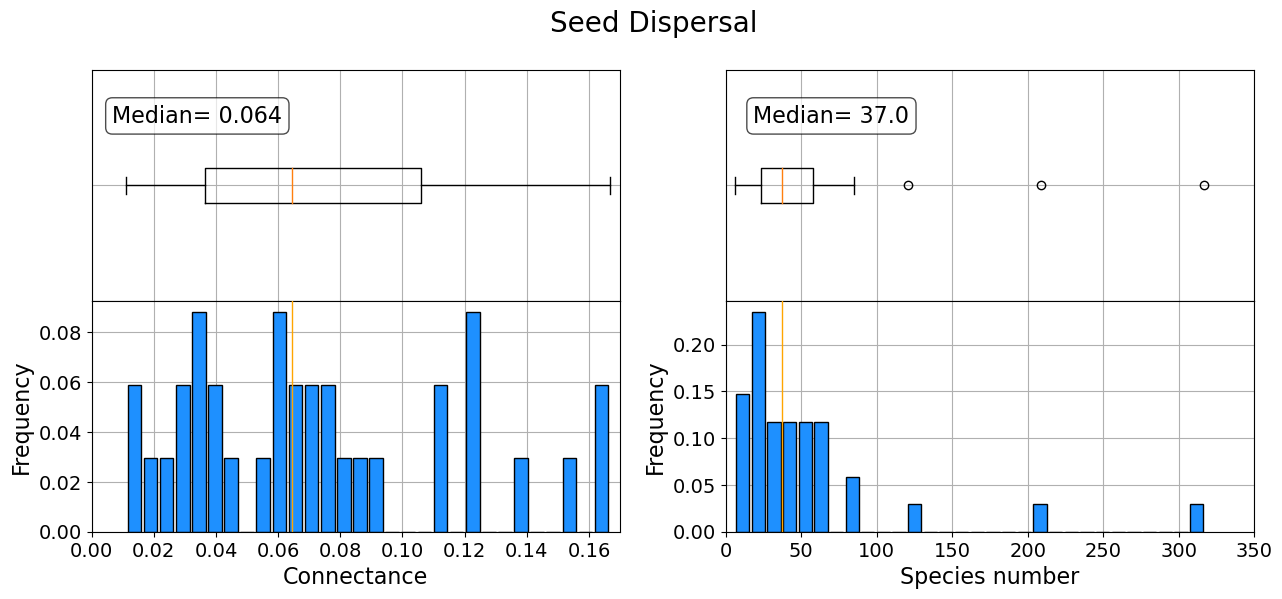

In [19]:
#Initialization of variables
S=[]
L=[]
C=[]

for line in lines :
    reader = csv.reader(open(path_seed_dispersal+line), delimiter=",")
    x = list(reader)
    mat = np.array(x).astype("float")

    # Number of species
    Species = (mat.shape[0]+ mat.shape[1])

    # Number of links
    A=mat.flatten()
    A=A[A!=0]
    Links=len(A)

    # Connectance
    Connectances= Links/(Species**2)

    S.append(Species)
    L.append(Links)
    C.append(Connectances)

Smedia=np.mean(S)
Lmedia=np.mean(L)
Cmedia=np.mean(C)
#median
Smedian=np.median(S)
Lmedian=np.median(L)
Cmedian=np.median(C)


print("Media of species observed in Seed dispersal ecosystem: ",Smedia)
print("Media of links observed in a Seed dispersal ecosystem: ",Lmedia)
print("Media of connectances observed in a Seed dispersal ecosystem: ",Cmedia)


#Figures
plt.figure(figsize=(15,6))


plt.subplot(221)

plt.boxplot(C,vert=False)
#Print round value for median text value
bbox_props=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
plt.text(0.2, 0.8, "Median= "+str(round(Cmedian,3)), fontsize=16, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes,bbox=bbox_props)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.grid()
plt.xlim(0, 0.17)
plt.subplot(223)
#normalized histogram y axis
counts, bins = np.histogram(C, bins=30)
#normalize counts
counts=counts/sum(counts)
#Vertical line across median in boxplot and histogram
plt.axvline(x=Cmedian, color='orange', linestyle='-',linewidth=1,zorder=3)


plt.hist(bins[:-1], bins, weights=counts,alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)
#

#plt.hist(C,bins=30, color='dodgerblue',edgecolor="black", alpha=1, rwidth=0.85,zorder=2)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel("Connectance", fontsize=16)
#tikcs size bigger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
plt.xlim(0, 0.17)
plt.subplot(222)

plt.boxplot(S,vert=False)
#Print round value for median text value
bbox_props=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7)
plt.text(0.2, 0.8, "Median= "+str(round(Smedian,2)), fontsize=16, horizontalalignment='center',verticalalignment='center', transform=plt.gca().transAxes,bbox=bbox_props)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)
plt.grid()
plt.xlim(0, 350)
plt.subplot(224)
#normalized histogram y axis
counts, bins = np.histogram(S, bins=30)
#normalize counts
counts=counts/sum(counts)
#Vertical line across median in boxplot and histogram
plt.axvline(x=Smedian, color='orange', linestyle='-',linewidth=1,zorder=3)
plt.hist(bins[:-1], bins, weights=counts,alpha=1, rwidth=0.85,color="dodgerblue",edgecolor="black",zorder=2)



#plt.hist(S,bins=30, color='dodgerblue',edgecolor="black", alpha=1, rwidth=0.85,zorder=2)
plt.ylabel('Frequency', fontsize=16)
plt.xlabel("Species number", fontsize=16)
#tikcs size bigger
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()
#join upper and lower plots
plt.subplots_adjust(hspace=0)
#same x axis for both plots
plt.xlim(0, 350)




plt.suptitle("Seed Dispersal", fontsize=20)
plt.savefig("/home/path.../seed_dispersal.png",dpi=300,bbox_inches="tight")


In [20]:
import numpy as np
a = np.array([[ 1.,  1.,  1.,  1.,  1.],[ 1.,  1.,  1.,  1.,  1.],[ 1.,  1.,  1.,  1.,  1.]])
np.pad(a, [(2, 0), (2, 0)])



array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.]])